# TFY41xx Fysikk våren 2021.

Programmet tar utgangspunkt i høyyden til de 8 festepunktene.
Deretter beregnes baneformen $y(x)$ ved hjelp av 7 tredjegradspolynomer, 
et for hvert intervall mellom to festepunkter, slik at både banen $y$, 
dens stigningstall $y^\prime = \frac{dy}{dx}$ og dens andrederiverte
 $y^{\prime \prime} = \frac{d^2y}{dx^2}$ er kontinuerlige i de 6 indre festepunktene.
 I tillegg velges null krumning (andrederivert) 
 i banens to ytterste festepunkter (med `bc_type='natural'` nedenfor).
 Dette gir i alt 28 ligninger som fastlegger de 28 koeffisientene
 i de i alt 7 tredjegradspolynomene.

 De ulike banene er satt opp med tanke paa at kula skal 

*   Fullføre hele banen selv om den taper noe mekanisk energi underveis;
*   Rulle rent, uten  gli ("slure").


Vi importerer noedvendige biblioteker:

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

Horisontal avstand mellom festepunktene er 0.200 m:

In [28]:
h = 0.200
xfast=np.asarray([0,h,2*h,3*h,4*h,5*h,6*h,7*h])

Start, slutt og steglengde i x-rettning

In [29]:
xmin = 0.000
xmax = 1.401
dx = 0.001

Skriv inn y-verdiene til banens 8 festepunkter i tabellen yfast, basert på avlesing i tracker. Et vilkårlig eksempel:

In [30]:
yfast = np.asarray([0.361,0.277,0.293,0.251,0.257,0.214,0.260,0.216])

Programmet beregner deretter de 7 tredjegradspolynomene, et for hvert intervall mellom to nabofestepunkter. Med scipy.interpolate-funksjonen CubicSpline:

In [31]:
cs = CubicSpline(xfast, yfast, bc_type='natural')


Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eventuelt for mange horisontale posisjoner lagret i en tabell: <br>
`cs(x)`   tilsvarer $y(x)$<br>
`cs(x,1)` tilsvarer $y'(x)$<br>
`cs(x,2)` tilsvarer $y''(x)$<br>

<br>
Her lager vi en tabell med x-verdier mellom 0 og 1.4 m

In [32]:
x = np.arange(xmin, xmax, dx) 

Funksjonen arange returnerer verdier på det "halvåpne" intervallet
`[xmin,xmax)`, dvs slik at xmin er med mens xmax ikke er med. Her blir
dermed `x[0]=xmin=0.000`, `x[1]=xmin+1*dx=0.001`, ..., `x[1400]=xmax-dx=1.400`, 
dvs x blir en tabell med 1401 elementer

In [33]:
Nx = len(x)
y = cs(x)       #y=tabell med 1401 verdier for y(x)
dy = cs(x,1)    #dy=tabell med 1401 verdier for y'(x)
d2y = cs(x,2)   #d2y=tabell med 1401 verdier for y''(x)

Eksempel: Plotter banens form y(x):

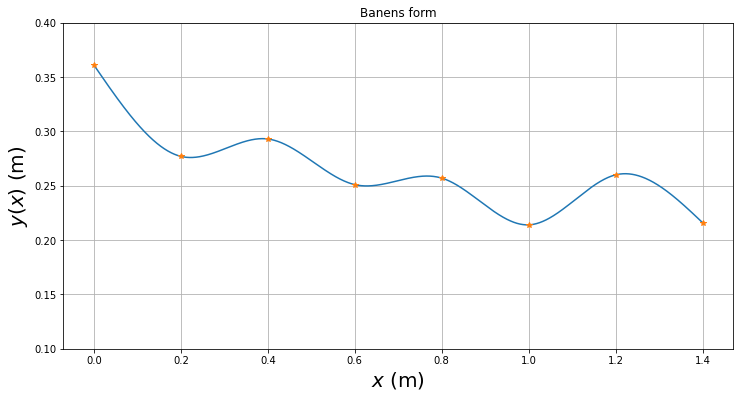

In [34]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$y(x)$ (m)',fontsize=20)
plt.ylim(0.10,0.40)
plt.grid()
plt.show()

Denne koden kan nå utvides til å regne ut flere interessante størelser:

In [35]:
print(xfast, yfast)

def clamp(a, b, c = 0):
    # Can do in one line, but is it worth it?
    if a > c :
        return c
    if b > a :
        return b
    return a 

def get_yfast(y, xfast = xfast):
    y_fast = []
    for x in xfast:
        # Self explanitory ???
        idx = clamp(int(np.floor(x / 1.4 * (len(y)))), 0, len(y) - 1)
        y_fast.append(y[idx])
    return y_fast

def plot(x, y, title="Plot", ylabel='y', xlabel='x', fast = False):
    y_fast = get_yfast(y)
    if fast:
        plt.plot(x, y, xfast, y_fast, "*")
    else:
        plt.plot(x, y)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid()
    plt.draw()
    plt.show()

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4] [0.361 0.277 0.293 0.251 0.257 0.214 0.26  0.216]


In [36]:
m = 0.031 #kilogram
r = 0.011 #meter
g = 9.81 #meter per sekund
c = 2/5 #massefordelingskonstant
y_0 = cs(0)
x_0 = 0

In [37]:
def speed(x):
    return np.sqrt(2*g*(y_0-cs(x))/1+c)

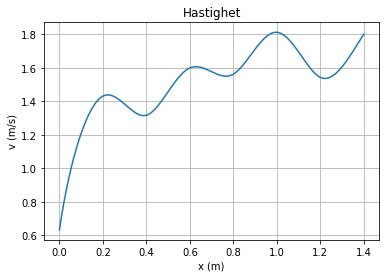

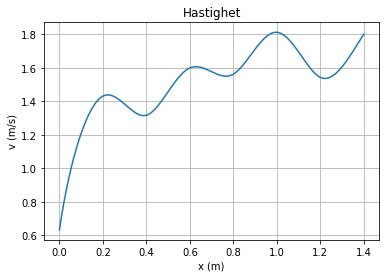

In [38]:
v = speed(x)
plot(x, v, 'Hastighet', 'v (m/s)', 'x (m)')
plot(x, v, 'Hastighet', 'v (m/s)', 'x (m)', False)

In [39]:
beta = np.arctan(dy)

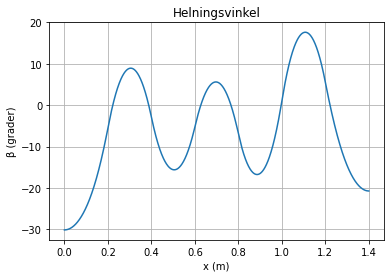

In [40]:
plot(x, np.rad2deg(beta), 'Helningsvinkel', 'β (grader)', 'x (m)')

In [41]:
k = d2y/(1+dy**2)**(3/2)

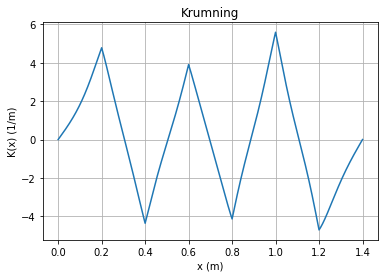

In [42]:
plot(x, k, "Krumning", 'K(x) (1/m)', 'x (m)')

In [43]:
# Sentripetalakselerasjon
a_s = v**2 * k

In [44]:
N = m * (g*np.cos(beta) + a_s)

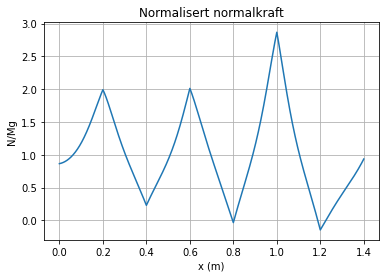

In [45]:
plot(x, N/(m*g), 'Normalisert normalkraft', 'N/Mg', 'x (m)')

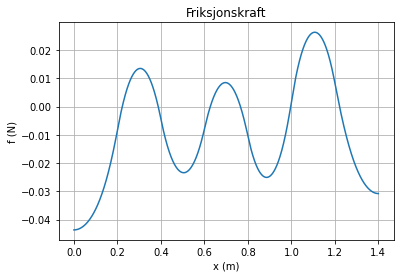

In [46]:
frik = (c*m*g*np.sin(beta))/(1+c)

plot(x, frik, 'Friksjonskraft', 'f (N)', 'x (m)')

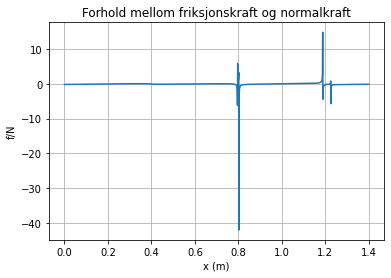

In [47]:

plot(x, frik/N, 'Forhold mellom friksjonskraft og normalkraft', 'f/N', 'x (m)')

In [48]:
v_0 = 0
v_x = v * np.cos(beta) 
dx = x[1:]-x[:-1]

In [49]:
dv_x = 0.5 * (v_x[:-1] + v_x[1:])
dt = dx/dv_x

# dt og slikt
sum_dt = np.sum(dt)

t = np.cumsum([0, *dt])

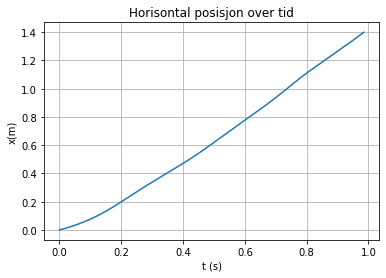

In [50]:
plot(t, x, title="Horisontal posisjon over tid", xlabel="t (s)", ylabel="x(m)", fast=False)

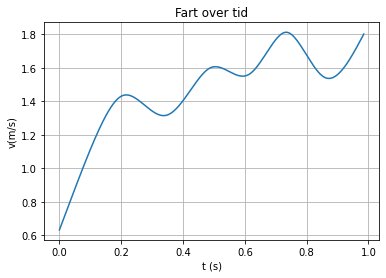

In [51]:
plot(t, v, title="Fart over tid", xlabel="t (s)", ylabel="v(m/s)", fast=False)

[0.361      0.36041856 0.35983715 ... 0.21675806 0.21637904 0.216     ]


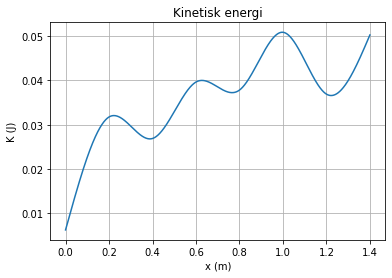

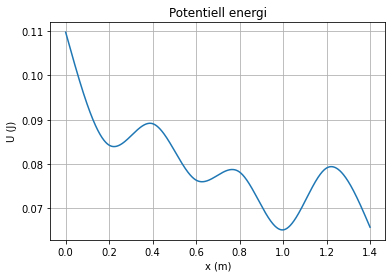

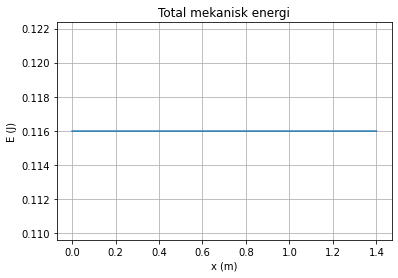

In [52]:
#Total kinetisk energi, eventuelt energitap

kinetic_energy = []

print(y)
for s in v:
    kinetic_energy.append(m * s**2 / 2)
    
plot(x, kinetic_energy, title="Kinetisk energi", xlabel="x (m)", ylabel="K (J)")

potential_energy = []

for h in y:
    potential_energy.append(m * g * (h - 0.0))
    
 
plot(x, potential_energy, title="Potentiell energi", xlabel="x (m)", ylabel="U (J)")

plot(x, np.array(potential_energy) + np.array(kinetic_energy), title="Total mekanisk energi", xlabel="x (m)", ylabel="E (J)")